In [68]:
import torch

In [69]:
import numpy as np
import time 
import matplotlib.pyplot as plt

In [70]:
x = torch.tensor([[1.0 , 4.0 , 7.0] , [2.0 , 3.0 , 6.0]])
x

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [71]:
x.shape , x.dtype


(torch.Size([2, 3]), torch.float32)

In [72]:
x[0,1]

tensor(4.)

In [73]:
x[: , 1]

tensor([4., 3.])

In [74]:
#addition itemwise
10 * (x + 1.0)

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [75]:
#itemwise exp
x.exp()

tensor([[   2.7183,   54.5981, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [76]:
#mean
x.mean()

tensor(3.8333)

In [77]:
x.max(dim=0) #max value per column i.e. dim 0

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [78]:
#lin alg 
#matrix transpose and matrix multiplication 

x @ x.T

tensor([[66., 56.],
        [56., 49.]])

In [79]:
#can change tensors to numpy array

x.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [80]:
torch.tensor(np.array([[1. , 4. , 7.] , [2. , 3. , 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [81]:
#better to use float32

torch.tensor(np.array([[1. , 4. , 7.] , [2. , 3. , 6.]]) , dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [82]:
#can use floattensor which auto use float32

torch.FloatTensor(np.array([[1. , 4. , 7.] , [2. , 3. , 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [83]:
x[: , 1] = -99

In [84]:
x

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In [85]:
x.relu_() #uses relu function

tensor([[1., 0., 7.],
        [2., 0., 6.]])

<h3><b><u>Hardware acceleration

In [86]:
if torch.cuda.is_available():
    device="cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [87]:
device

'cuda'

In [88]:
m = torch.tensor([[1. , 4. , 7.] , [2. , 3. , 6.]]) #create tensor on cpu then copy it to gpu
m = m.to(device)

In [89]:
m.device

device(type='cuda', index=0)

In [90]:
#create tensor directly on gpu using device argument

m = torch.tensor([[1. , 4. , 7.] , [2. , 3. , 6.]] , device=device)

In [91]:
r = m @ m.T #ran on gpu
r

tensor([[66., 56.],
        [56., 49.]], device='cuda:0')

In [92]:
# m_ = torch.rand((1000 , 1000))
# %timeit m_ @ m_.T

In [93]:
# m = torch.rand((100 , 100) , device="cuda")
# torch.cuda.synchronize()

In [94]:
# m_yeah = torch.rand((1000 , 1000) , device="cuda")
# %timeit m_yeah @ m_yeah.T

In [95]:
x = torch.tensor(5.0 , requires_grad=True , device="cuda")

In [96]:
x

tensor(5., device='cuda:0', requires_grad=True)

In [97]:
f = x**2

In [98]:
f.backward()
x.grad

tensor(10., device='cuda:0')

In [99]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad 
    
x 

tensor(4., device='cuda:0', requires_grad=True)

/tmp/ipykernel_302258/2999199296.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-x)


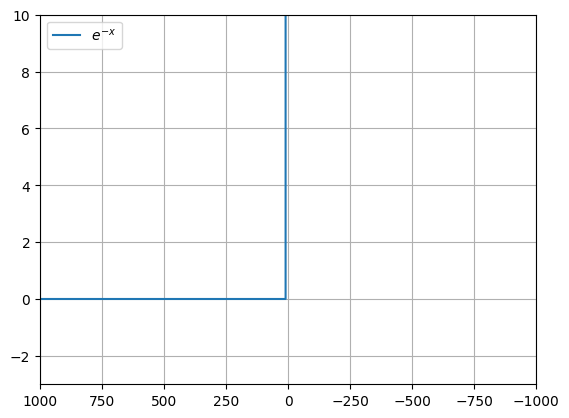